Importing necessary libraries and Dataset we used in Practical 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("teachers_rating_dataset.csv")
df.head(10)

,Prof,Gender,Tenure,Beauty,Rating,Students,Age,Division
0,Prof_52,Female,No,5.66,4.11,62,26,Upper Division
1,Prof_93,Male,Yes,7.28,3.86,95,37,Lower Division
2,Prof_15,Female,No,7.02,4.22,84,35,Upper Division
3,Prof_72,Male,Yes,8.15,4.57,300,47,Lower Division
4,Prof_61,Female,No,6.68,4.25,131,40,Lower Division
5,Prof_21,Male,No,5.80,4.53,118,55,Upper Division
6,Prof_83,Male,No,5.83,3.67,96,35,Upper Division
7,Prof_87,Female,No,3.68,3.57,74,40,Upper Division
8,Prof_75,Female,Yes,6.18,3.73,115,32,Upper Division
9,Prof_75,Female,No,5.98,3.37,59,28,Lower Division


Q1) Identify all duplicate cases using prof. Using all observations, find the average and standard deviation for age. Repeat the analysis by first filtering the data set to include one observation for each instructor with a total number of observations restricted to 94.


In [5]:
duplicates = df[df.duplicated('Prof', keep=False)]
print("Duplicate professors found:\n", duplicates['Prof'].unique())

mean_age_all = df['Age'].mean()
std_age_all = df['Age'].std()

print("\nUsing ALL observations:")
print(f"Mean Age: {mean_age_all:.2f}")
print(f"Standard Deviation of Age: {std_age_all:.2f}")

Duplicate professors found:
 ['Prof_93' 'Prof_15' 'Prof_72' 'Prof_21' 'Prof_87' 'Prof_75' 'Prof_88'
 'Prof_24' 'Prof_3' 'Prof_22' 'Prof_53' 'Prof_2' 'Prof_64' 'Prof_60'
 'Prof_33' 'Prof_89' 'Prof_92' 'Prof_80' 'Prof_62' 'Prof_47' 'Prof_51'
 'Prof_18' 'Prof_4' 'Prof_14' 'Prof_9' 'Prof_90' 'Prof_71' 'Prof_44'
 'Prof_8' 'Prof_35' 'Prof_78' 'Prof_81' 'Prof_54' 'Prof_63']

Using ALL observations:
Mean Age: 41.41
Standard Deviation of Age: 10.06


In [6]:
df_unique = df.drop_duplicates(subset='Prof').head(94)

mean_age_unique = df_unique['Age'].mean()
std_age_unique = df_unique['Age'].std()

print("\nUsing ONE observation per instructor (94 total):")
print(f"Mean Age: {mean_age_unique:.2f}")
print(f"Standard Deviation of Age: {std_age_unique:.2f}")


Using ONE observation per instructor (94 total):
Mean Age: 40.51
Standard Deviation of Age: 9.86


Q2) Using a bar chart, demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations.

/tmp/ipython-input-665765054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Division', y='Rating', data=avg_rating_by_div, palette='viridis')


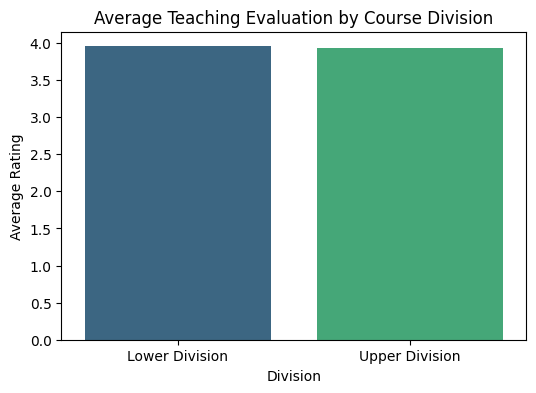


Average Ratings by Division:
          Division    Rating
0  Lower Division  3.954063
1  Upper Division  3.932679


In [7]:
avg_rating_by_div = df.groupby('Division')['Rating'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Division', y='Rating', data=avg_rating_by_div, palette='viridis')
plt.title('Average Teaching Evaluation by Course Division')
plt.ylabel('Average Rating')
plt.xlabel('Division')
plt.show()

print("\nAverage Ratings by Division:\n", avg_rating_by_div)


Q3) Plot the relationship between age and teaching evaluation scores.

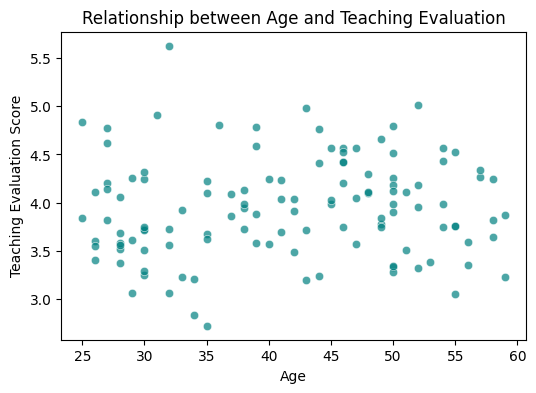

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Rating', data=df, color='teal', alpha=0.7)
plt.title('Relationship between Age and Teaching Evaluation')
plt.xlabel('Age')
plt.ylabel('Teaching Evaluation Score')
plt.show()

Q4) Using gender-differentiated scatter plots, plot the relationship between age and teaching evaluation scores.

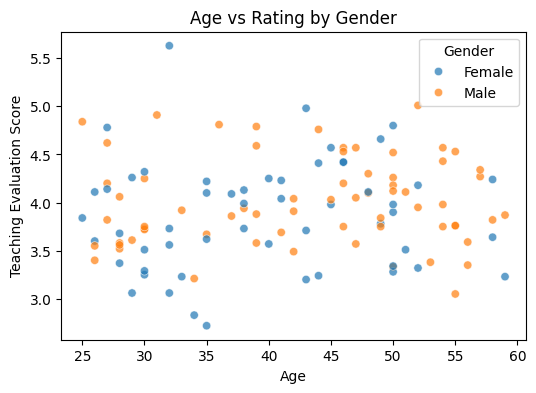

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Rating', hue='Gender', data=df, alpha=0.7)
plt.title('Age vs Rating by Gender')
plt.xlabel('Age')
plt.ylabel('Teaching Evaluation Score')
plt.legend(title='Gender')
plt.show()


Q5) Create a scatterplot of age and evaluation scores, differentiated by gender and tenure

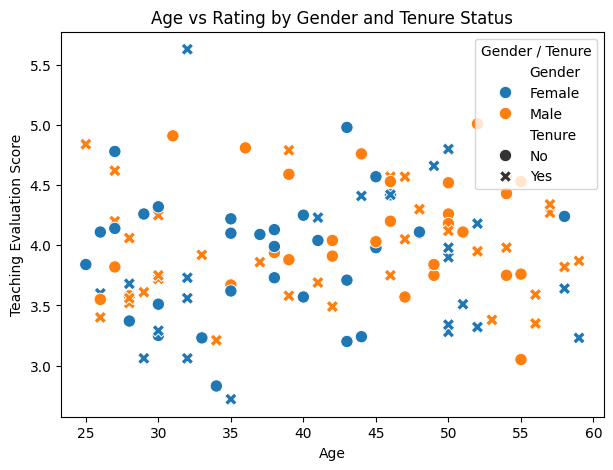

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='Rating', hue='Gender', style='Tenure', data=df, s=80)
plt.title('Age vs Rating by Gender and Tenure Status')
plt.xlabel('Age')
plt.ylabel('Teaching Evaluation Score')
plt.legend(title='Gender / Tenure')
plt.show()